In [14]:
options(repr.plot.width=8, repr.plot.height=5, jupyter.plot_mimetypes='image/svg+xml')
source('common.r')
out <- function(obj) write(obj, stdout())

In [15]:
d <- data.rubis.socc(where="name like 'v6%' and rebid_prob = '0.0' and alpha = '1.5'")
out("rows: " + nrow(d))

#modes <- c(RW+PH, COMM, COMM+PH, COMB+PH, NOTXN, REDIS)
#d <- subset(d, cc_ph %in% modes)
#d$cc_ph <- factor(d$cc_ph, levels = rev(modes))

d$x <- d$threads * num(d$nclients)
d$label <- d$threads #* num(d$nclients) + "x" + d$rate
d$facet <- d$zmix

s <- subset(d, async == 0 
            & total_time > 60 & total_time < 65 
            & (txn_failed < 10 | is.na(txn_failed))
           )
out("rows: " + nrow(s))

The following `from` values were not present in `x`: better#0, better#1
The following `from` values were not present in `x`: better#0, better#1
The following `from` values were not present in `x`: rw#0#off#0, simple#0#off#0, simple#1#off#0, better#0#off#0, better#1#off#0, better#0#on#0, better#1#on#0, redis#0#NA#0


rows: 892
rows: 878


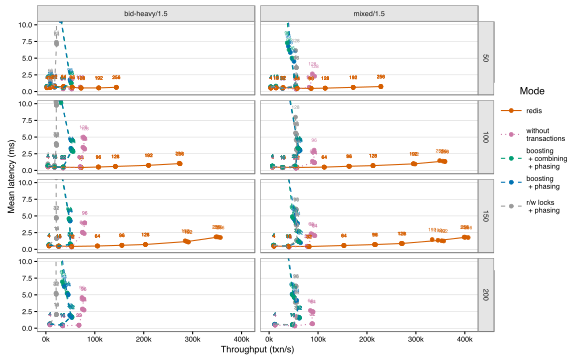

In [16]:
ggplot(s, aes(
    x = throughput,
    y = avg_latency_ms,
    group = cc_ph, fill = cc_ph, color = cc_ph, linetype = cc_ph
))+
  xlab('Throughput (txn/s)')+ylab('Mean latency (ms)')+
  geom_point()+
  geom_text(aes(label=label), size=1.7, nudge_y=1.5)+
  # scale_x_continuous(labels=si.labels())+
  scale_x_continuous(labels = function(x){ x/1000+'k' })+
  # geom_point()+
  geom_mean_path(s, throughput, avg_latency_ms, .(x,facet,cc_ph,rate))+
  expand_limits(y=0)+
#   facet_wrap(~facet, scales="free")+
  facet_grid(rate~facet)+
  # cc_scales()+phasing.linetype()+
  cc_ph_scales()+
  coord_cartesian(ylim=c(0,10))+
  my_theme() #+theme(legend.position='bottom')

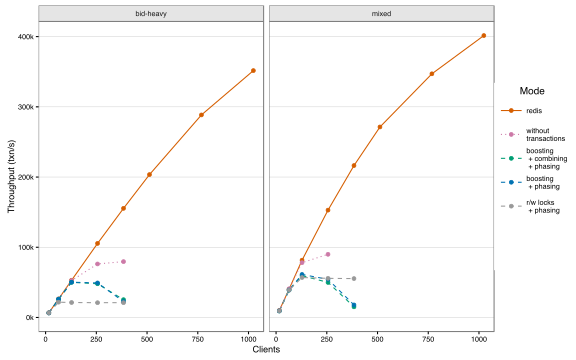

In [17]:
ss <- subset(s, rate == 150 & alpha == '1.5')

ggplot(ss, aes(
    x = x,
    y = throughput,
    group = cc_ph, fill = cc_ph, color = cc_ph, linetype = cc_ph
  ))+
  xlab('Clients')+ylab('Throughput (txn/s)')+
  stat_summary(geom='line', fun.y=mean)+
  stat_summary(geom='point', fun.y=mean)+
  scale_y_continuous(labels = function(x){ x/1000+'k' })+  
  expand_limits(y=0)+
  facet_wrap(~mix)+
  cc_ph_scales()+
  my_theme() #+theme(legend.position='bottom')


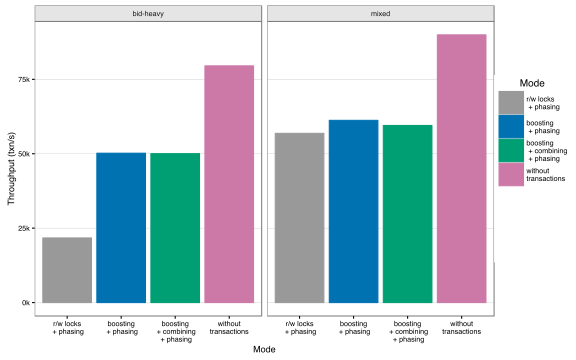

In [21]:
s.mean <- ddply(ss, .(x,rate,x,mix,cc_ph), summarize, throughput=mean(throughput), latency=mean(avg_latency_ms))

modes <- c(RW+PH, COMM, COMM+PH, COMB+PH, NOTXN, REDIS)
s.mean$cc_ph <- factor(s.mean$cc_ph, levels = modes)

ggplot(subset(s.mean, cc_ph != REDIS), aes(
    x = cc_ph, color = cc_ph, fill = cc_ph,
    y = throughput
))+
xlab('Mode')+ylab('Throughput (txn/s)')+
stat_summary(geom='bar', fun.y=max)+
scale_y_continuous(labels=function(x){ x/1000+'k' })+
expand_limits(y=0)+
facet_wrap(~mix)+
cc_ph_scales()+
my_theme()